# Netflix data analysis project

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [83]:
df = pd.read_csv('https://raw.githubusercontent.com/TheiScale/YouTube-Video-Notes/refs/heads/main/New%20Netflix%20Data%20Analysis%20Project%202025/mymoviedb.csv'
                ,lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [85]:
# check for missing values 
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

Our data has no missing values.

In [86]:
df['Genre'].unique()

array(['Action, Adventure, Science Fiction', 'Crime, Mystery, Thriller',
       'Thriller', ..., 'Comedy, TV Movie, Romance',
       'Science Fiction, Fantasy, Family, Music',
       'War, Drama, Science Fiction'], dtype=object)

In [87]:
df['Genre']

0       Action, Adventure, Science Fiction
1                 Crime, Mystery, Thriller
2                                 Thriller
3       Animation, Comedy, Family, Fantasy
4         Action, Adventure, Thriller, War
                       ...                
9822                          Drama, Crime
9823                                Horror
9824             Mystery, Thriller, Horror
9825                 Music, Drama, History
9826           War, Drama, Science Fiction
Name: Genre, Length: 9827, dtype: object

In [88]:
# check for duplicated rows
df.duplicated().sum()

0

No duplicated rows

In [89]:
# how my data looks mathematically.
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [90]:
# correlation of cols
df.corr(numeric_only=True)

,Popularity,Vote_Count,Vote_Average
Popularity,1.000000,0.137400,0.053844
Vote_Count,0.137400,1.000000,0.253574
Vote_Average,0.053844,0.253574,1.000000


In [91]:
df.shape

(9827, 9)

* Exploration summary

* We have 9827 rows and 9 columns.
* Our dataset has no missing and duplicated values.
* Release_date columns needs to be casted into datetime.

# Data cleaning

In [92]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [93]:
# change release_data column into datetime.
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_Date'].dtypes

dtype('<M8[ns]')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9827 non-null   object        
 2   Overview           9827 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   int64         
 5   Vote_Average       9827 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9827 non-null   object        
 8   Poster_Url         9827 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 691.1+ KB


In [95]:
# create month col
df['Release_month'] = df['Release_Date'].dt.month
# create year col
df['Release_year'] = df['Release_Date'].dt.year
# create day col
df['Release_day'] = df['Release_Date'].dt.day

In [96]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_month,Release_year,Release_day
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,12,2021,15
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,3,2022,1
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2,2022,25
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,11,2021,24
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,12,2021,22


In [97]:
# drop col that no needed.
df.drop(columns=['Release_Date', 'Overview', 'Poster_Url'], axis=1, inplace=True)

In [98]:
df.head().T

,0,1,2,3,4
Title,Spider-Man: No Way Home,The Batman,No Exit,Encanto,The King's Man
Popularity,5083.954,3827.658,2618.087,2402.201,1895.511
Vote_Count,8940,1151,122,5076,1793
Vote_Average,8.3,8.1,6.3,7.7,7.0
Original_Language,en,en,en,en,en
Genre,"Action, Adventure, Science Fiction","Crime, Mystery, Thriller",Thriller,"Animation, Comedy, Family, Fantasy","Action, Adventure, Thriller, War"
Release_month,12,3,2,11,12
Release_year,2021,2022,2022,2021,2021
Release_day,15,1,25,24,22


Changing `Vote_Average` col to category. `Popular`, `Average`, `below_avg`, `not_popular`

In [99]:
df['Vote_Average'].describe()

count    9827.000000
mean        6.439534
std         1.129759
min         0.000000
25%         5.900000
50%         6.500000
75%         7.100000
max        10.000000
Name: Vote_Average, dtype: float64

In [100]:
def categorize_col(df, col, labels):
    """
    Categories a certain column based on its quartiles.
    Args:
        (df) df- dataframe we are processing.
        (col) col- Column's name.
        (labels) labels- list of labels from min to max.
    returns:
    (df) df- dataframe with categorized col.
    """
    # set the edges
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df


# defines labels
labels = [
    'non_popular', 'below_avg', 'average', 'Popular'
]

In [101]:
categorize_col(df, 'Vote_Average', labels)

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Release_month,Release_year,Release_day
0,Spider-Man: No Way Home,5083.954,8940,Popular,en,"Action, Adventure, Science Fiction",12,2021,15
1,The Batman,3827.658,1151,Popular,en,"Crime, Mystery, Thriller",3,2022,1
2,No Exit,2618.087,122,below_avg,en,Thriller,2,2022,25
3,Encanto,2402.201,5076,Popular,en,"Animation, Comedy, Family, Fantasy",11,2021,24
4,The King's Man,1895.511,1793,average,en,"Action, Adventure, Thriller, War",12,2021,22
...,...,...,...,...,...,...,...,...,...
9822,Badlands,13.357,896,Popular,en,"Drama, Crime",10,1973,15
9823,Violent Delights,13.356,8,non_popular,es,Horror,10,2020,1
9824,The Offering,13.355,94,non_popular,en,"Mystery, Thriller, Horror",5,2016,6
9825,The United States vs. Billie Holiday,13.354,152,average,en,"Music, Drama, History",3,2021,31


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Title              9827 non-null   object  
 1   Popularity         9827 non-null   float64 
 2   Vote_Count         9827 non-null   int64   
 3   Vote_Average       9727 non-null   category
 4   Original_Language  9827 non-null   object  
 5   Genre              9827 non-null   object  
 6   Release_month      9827 non-null   int32   
 7   Release_year       9827 non-null   int32   
 8   Release_day        9827 non-null   int32   
dtypes: category(1), float64(1), int32(3), int64(1), object(3)
memory usage: 509.0+ KB


In [103]:
df['Vote_Average'].unique()

['Popular', 'below_avg', 'average', 'non_popular', NaN]
Categories (4, object): ['non_popular' < 'below_avg' < 'average' < 'Popular']

In [104]:
df['Vote_Average'].value_counts()

Vote_Average
non_popular    2467
Popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [105]:
df.isnull().mean() #shows the missing percenatge

Title                0.000000
Popularity           0.000000
Vote_Count           0.000000
Vote_Average         0.010176
Original_Language    0.000000
Genre                0.000000
Release_month        0.000000
Release_year         0.000000
Release_day          0.000000
dtype: float64

In [106]:
# drop the Nan values
df.dropna(inplace=True)
df.isnull().sum()

Title                0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Release_month        0
Release_year         0
Release_day          0
dtype: int64

In [107]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Release_month,Release_year,Release_day
0,Spider-Man: No Way Home,5083.954,8940,Popular,en,"Action, Adventure, Science Fiction",12,2021,15
1,The Batman,3827.658,1151,Popular,en,"Crime, Mystery, Thriller",3,2022,1
2,No Exit,2618.087,122,below_avg,en,Thriller,2,2022,25
3,Encanto,2402.201,5076,Popular,en,"Animation, Comedy, Family, Fantasy",11,2021,24
4,The King's Man,1895.511,1793,average,en,"Action, Adventure, Thriller, War",12,2021,22


Lets split the genre into one row at a time.

In [108]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Release_month,Release_year,Release_day
0,Spider-Man: No Way Home,5083.954,8940,Popular,en,Action,12,2021,15
1,Spider-Man: No Way Home,5083.954,8940,Popular,en,Adventure,12,2021,15
2,Spider-Man: No Way Home,5083.954,8940,Popular,en,Science Fiction,12,2021,15
3,The Batman,3827.658,1151,Popular,en,Crime,3,2022,1
4,The Batman,3827.658,1151,Popular,en,Mystery,3,2022,1


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Title              25552 non-null  object  
 1   Popularity         25552 non-null  float64 
 2   Vote_Count         25552 non-null  int64   
 3   Vote_Average       25552 non-null  category
 4   Original_Language  25552 non-null  object  
 5   Genre              25552 non-null  object  
 6   Release_month      25552 non-null  int32   
 7   Release_year       25552 non-null  int32   
 8   Release_day        25552 non-null  int32   
dtypes: category(1), float64(1), int32(3), int64(1), object(3)
memory usage: 1.3+ MB


In [110]:
# casting column into category
df['Genre'].astype('category')

0                 Action
1              Adventure
2        Science Fiction
3                  Crime
4                Mystery
              ...       
25547              Drama
25548            History
25549                War
25550              Drama
25551    Science Fiction
Name: Genre, Length: 25552, dtype: category
Categories (19, object): ['Action', 'Adventure', 'Animation', 'Comedy', ..., 'TV Movie', 'Thriller', 'War', 'Western']

In [111]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Release_month,Release_year,Release_day
0,Spider-Man: No Way Home,5083.954,8940,Popular,en,Action,12,2021,15
1,Spider-Man: No Way Home,5083.954,8940,Popular,en,Adventure,12,2021,15
2,Spider-Man: No Way Home,5083.954,8940,Popular,en,Science Fiction,12,2021,15
3,The Batman,3827.658,1151,Popular,en,Crime,3,2022,1
4,The Batman,3827.658,1151,Popular,en,Mystery,3,2022,1


In [112]:
df.nunique()

Title                9415
Popularity           8088
Vote_Count           3265
Vote_Average            4
Original_Language      42
Genre                  19
Release_month          12
Release_year          100
Release_day            31
dtype: int64

# Data visualisation

## Q. What is the most frequent genre in out dataset.

In [113]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

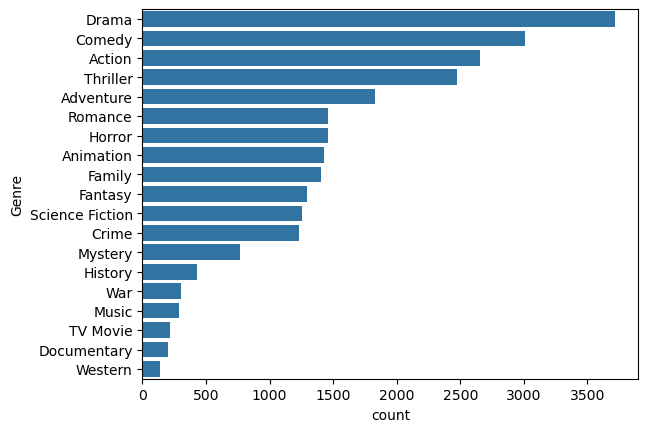

In [114]:
sns.countplot(df['Genre'], order=df['Genre'].value_counts().sort_values(ascending=False).index);

As we can see in the visualisation that most frequent genre among all 19 genre is the 'Drama' genre.

In [115]:
df.sample(3)

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Release_month,Release_year,Release_day
1583,X-Men: Apocalypse,98.469,11110,below_avg,en,Adventure,5,2016,18
20165,Christmas with a View,15.776,260,non_popular,en,Family,11,2018,1
23457,Untamed Heart,14.167,161,average,en,Comedy,2,1993,12


## Q. What genre has Highest `vote_count`

In [116]:
df.groupby('Genre')['Vote_Count'].sum().sort_values()

Genre
Documentary          38224
TV Movie             68441
Western             186860
Music               297446
War                 448918
History             527056
Mystery            1181275
Horror             1448486
Animation          1525045
Romance            1803756
Crime              1980261
Family             2046625
Fantasy            2521940
Science Fiction    2850476
Thriller           3631594
Comedy             3933497
Adventure          4313869
Action             4868675
Drama              5141495
Name: Vote_Count, dtype: int64

Drama genre also has the highest vote_count.

## Q. What movie got the highest popularity and what its genre?

In [117]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Release_month,Release_year,Release_day
0,Spider-Man: No Way Home,5083.954,8940,Popular,en,Action,12,2021,15
1,Spider-Man: No Way Home,5083.954,8940,Popular,en,Adventure,12,2021,15
2,Spider-Man: No Way Home,5083.954,8940,Popular,en,Science Fiction,12,2021,15
3,The Batman,3827.658,1151,Popular,en,Crime,3,2022,1
4,The Batman,3827.658,1151,Popular,en,Mystery,3,2022,1


In [118]:
df[df['Popularity'] == df['Popularity'].max()]

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Release_month,Release_year,Release_day
0,Spider-Man: No Way Home,5083.954,8940,Popular,en,Action,12,2021,15
1,Spider-Man: No Way Home,5083.954,8940,Popular,en,Adventure,12,2021,15
2,Spider-Man: No Way Home,5083.954,8940,Popular,en,Science Fiction,12,2021,15


The highest Populairty movies is `Spider-Man: No way home` and its genre is `action, advanture abd science fiction`

## Q. What movie got the lowest popularity and what its genre?

In [119]:
df[df['Popularity'] == df['Popularity'].min()].head(1)

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Release_month,Release_year,Release_day
25546,The United States vs. Billie Holiday,13.354,152,average,en,Music,3,2021,31


## Q. Which year has the most filmed movies?

In [120]:
df['Release_year'].value_counts().sort_values(ascending=False).head(1)

Release_year
2021    1636
Name: count, dtype: int64

In [121]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Release_month,Release_year,Release_day
0,Spider-Man: No Way Home,5083.954,8940,Popular,en,Action,12,2021,15
1,Spider-Man: No Way Home,5083.954,8940,Popular,en,Adventure,12,2021,15
2,Spider-Man: No Way Home,5083.954,8940,Popular,en,Science Fiction,12,2021,15
3,The Batman,3827.658,1151,Popular,en,Crime,3,2022,1
4,The Batman,3827.658,1151,Popular,en,Mystery,3,2022,1


## Conclusion
**Q. What is the most frequent genre in out dataset?**

The most frequent genre in our data is `Drama` genre it has appeared 14% times in our data among all 19 genre.

**Q. What genre has Highest vote_count?**

`Drama` genre has the highest vote_count.

**Q. What movie got the highest popularity and what its genre?**

The most popular movie according to our data is `Spider-man: No way home` and its genre is `Action, Adventure, Science fiction`.

**Q. What movie got the lowest popularity and what its genre?**

The least popular movie is `The United States vs. Billie Holiday` and its genre is `Music`

**Q. Which year has the most filmed movies?**

2021 was that year with 1636 movies.
